## Вариант - 7

In [1]:
# knn своими руками

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import svm
from sklearn.datasets import make_classification

## Задание 1

In [3]:
data1 = [
    ('солнечно', True),
    ('снег', False),
    ('облачно', False),
    ('дождь', False),
    ('солнечно', True),
    ('снег', False),
    ('облачно', True),
    ('снег', False),
    ('солнечно', False),
    ('облачно', True),
    ('снег', True),
    ('солнечно', True),
    ('дождь', False),
    ('дождь', True),
    ('облачно', True),
]

In [4]:
df1 = pd.DataFrame(data1, columns=['погода', 'прогулка'])
df1.head(15)

,погода,прогулка
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


In [5]:
total_with_rain = df1[df1['погода'] == 'дождь'].shape[0] # выбирает строки, где значение в столбце 'погода' равно 'дождь'. 
# .shape[0] - число строк
walk_with_rain = df1[(df1['погода'] == 'дождь') & (df1['прогулка'] == True)].shape[0] # поднабор данных, где идет дождь и  совершается прогулка.
print(f'Вероятность прогулки при наличии дождя: {(walk_with_rain / total_with_rain)*100}%')

Вероятность прогулки при наличии дождя: 33.33333333333333%


## Задание 2

In [6]:
data= pd.read_csv('D:\python\data\card_transdata.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Датасет содержит следующие поля:
distance_from_home (расстояние от дома): Это числовой признак, представляющий собой расстояние от места проведения транзакции до дома клиента.

distance_from_last_transaction (расстояние от последней транзакции): Также числовой признак, который указывает на расстояние от текущей транзакции до предыдущей транзакции.

ratio_to_median_purchase_price (отношение к медианной цене покупки): Этот признак представляет собой отношение стоимости текущей покупки к медианной стоимости покупки в каком-то определенном контексте.

repeat_retailer (повторное обращение к розничному продавцу): Этот бинарный признак указывает, является ли проведенная транзакция повторным обращением к тому же розничному продавцу.

used_chip (использование чипа): Бинарный признак, который указывает, был ли использован чип при проведении транзакции.

used_pin_number (использование PIN-кода): Еще один бинарный признак, указывающий, использовался ли PIN-код при проведении транзакции.

online_order (онлайн-заказ): Бинарный признак, который, возможно, указывает, была ли транзакция осуществлена через интернет или каким-то иным онлайн-способом.

fraud (мошенничество): Целевая переменная или метка класса, которая указывает, была ли транзакция классифицирована как мошенническая (1) или нет (0).

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
data.head(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


In [9]:
data.duplicated().sum()

0

In [10]:
data.isna().sum() #подсчета количества пропущенных значений в каждом столбце

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [11]:
data.describe().T # статистического описания данных(.T - транспонирование) (std мера разброса значений относительно их среднего значения.)

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


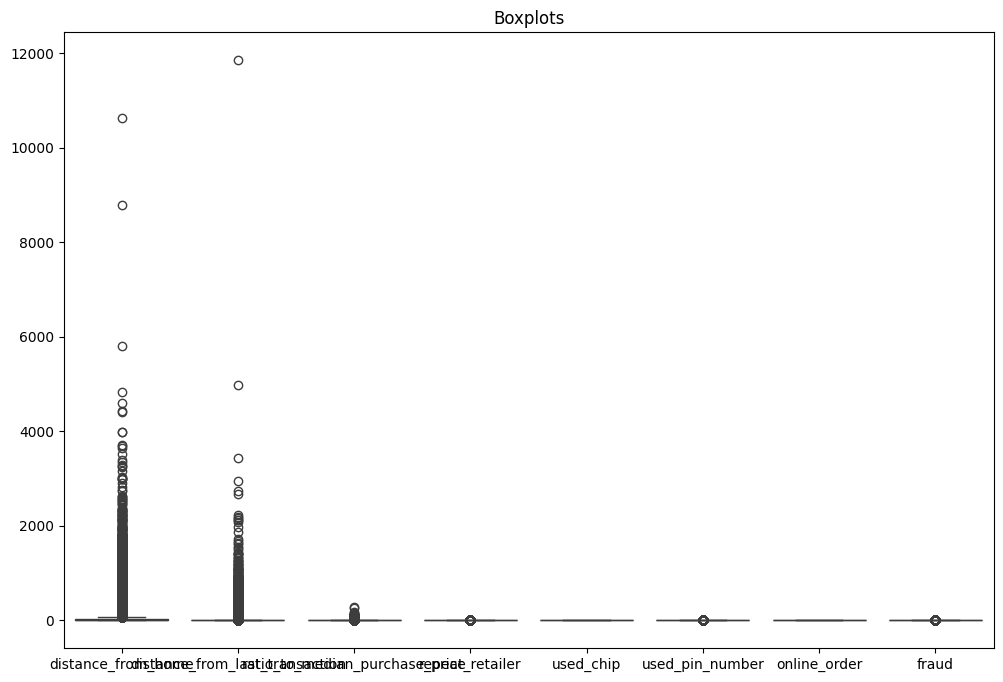

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(data)
plt.title('Boxplots')
plt.show()

In [13]:
#пришлось убрать fraud тк иначе удалялись значения с 1 
Q1 = data.drop("fraud", axis=1).quantile(0.25)
Q3 = data.drop("fraud", axis=1).quantile(0.75)
IQR = Q3 - Q1

# Отфильтрованные данные, из которых удалены выбросы только в других столбцах
data_filtered = data[~((data.drop("fraud", axis=1) < (Q1 - 1.5 * IQR)) | (data.drop("fraud", axis=1) > (Q3 + 1.5 * IQR))).any(axis=1)]
data_filtered = data_filtered.reset_index(drop=True)
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561043 entries, 0 to 561042
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   distance_from_home              561043 non-null  float64
 1   distance_from_last_transaction  561043 non-null  float64
 2   ratio_to_median_purchase_price  561043 non-null  float64
 3   repeat_retailer                 561043 non-null  float64
 4   used_chip                       561043 non-null  float64
 5   used_pin_number                 561043 non-null  float64
 6   online_order                    561043 non-null  float64
 7   fraud                           561043 non-null  float64
dtypes: float64(8)
memory usage: 34.2 MB


In [14]:
print(data_filtered['fraud'].unique())

[0. 1.]


In [15]:
y = data_filtered["fraud"]
X = data_filtered.drop(["fraud"], axis=1)

In [16]:
sm = SMOTE()
X, y = sm.fit_resample(X, y)
#избавимся от дисбаланса классов

In [17]:
columns_to_scale = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
X[columns_to_scale] = MinMaxScaler().fit_transform(X[columns_to_scale]) 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

## Логистическая регрессия

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Оценка модели как в примере
print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    110698
         1.0       1.00      1.00      1.00    110698

    accuracy                           1.00    221396
   macro avg       1.00      1.00      1.00    221396
weighted avg       1.00      1.00      1.00    221396

Predicted labels:  [0. 1. 0. ... 1. 1. 1.]
F1-score:  0.9977197141080296


In [20]:
# Оценка модели
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print(f'Precission: {metrics.precision_score(y_test, predictions)}')
print(f'Roc_Auc_Score: {metrics.roc_auc_score(y_test, predictions)}')
print(f'Recall: {metrics.recall_score(y_test, predictions)}')
print(f'F1: {metrics.f1_score(y_test, predictions)}')

Accuracy: 0.9977145025203707
Precission: 0.9954498039638862
Roc_Auc_Score: 0.9977145025203707
Recall: 1.0
F1: 0.9977197141080296


In [21]:
confusion_matrix(y_test, predictions)

array([[110192,    506],
       [     0, 110698]], dtype=int64)

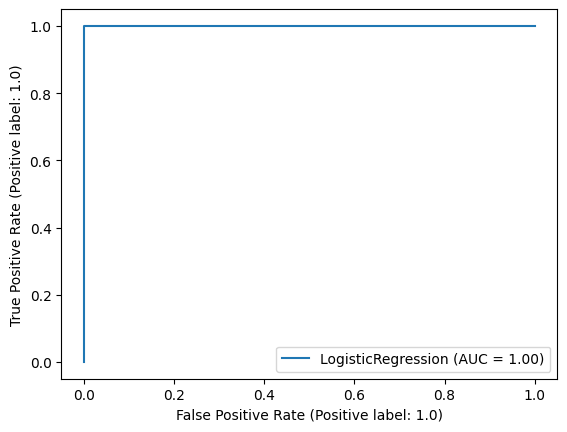

In [22]:
logisticreg_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)

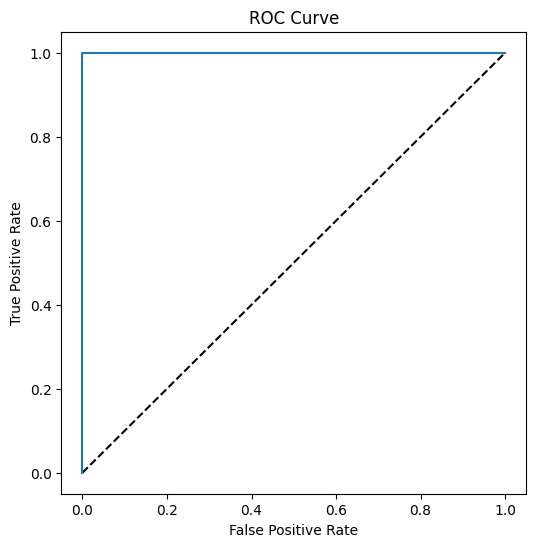

In [23]:
# это долгий вывод как в примере
%matplotlib inline
y_scores = model.predict_proba(X_test)
# Вычислить ROC кривую
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1]) # принадлежит к классу с 1
# Построить ROC кривую
fig = plt.figure(figsize=(6, 6))
# Постройте диагональную линию 50%
plt.plot([0, 1], [0, 1], 'k--') 
# Построить FPR and TPR, которые достигаются нашей моделью
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [24]:
# Рассчитать показатель AUC
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.9999999787825202


## KNN

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)

In [26]:
knn_model = knn.fit(X_train, y_train)

In [27]:
knn_predictions = knn.predict(X_test)
knn_predictions

array([0., 1., 0., ..., 1., 1., 1.])

In [28]:
confusion_matrix(y_test, knn_predictions)

array([[110554,    144],
       [     0, 110698]], dtype=int64)

In [29]:
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy}')
print(f'Precission: {metrics.precision_score(y_test, knn_predictions)}')
print(f'Roc_Auc_Score: {metrics.roc_auc_score(y_test, knn_predictions)}')
print(f'Recall: {metrics.recall_score(y_test, knn_predictions)}')
print(f'F1: {metrics.f1_score(y_test, knn_predictions)}')

Accuracy: 0.9993495817449276
Precission: 0.9987008534670974
Roc_Auc_Score: 0.9993495817449277
Recall: 1.0
F1: 0.9993500045138576


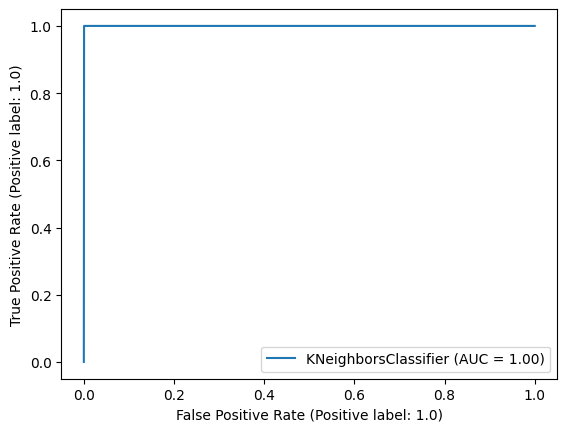

In [30]:
knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

In [31]:
# Рассчитать показатель AUC
y_scores = knn.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test,y_scores)
print(auc)

0.9997154373618814


## Naive Bayes

In [32]:
gnbclassifier = GaussianNB()
gnbclassifier.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred = gnbclassifier.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    110698
         1.0       0.98      1.00      0.99    110698

    accuracy                           0.99    221396
   macro avg       0.99      0.99      0.99    221396
weighted avg       0.99      0.99      0.99    221396



In [35]:
print(confusion_matrix(y_test, y_pred))

[[108808   1890]
 [     0 110698]]


In [36]:
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Precission: {metrics.precision_score(y_test, y_pred)}')
print(f'Roc_Auc_Score: {metrics.roc_auc_score(y_test, y_pred)}')
print(f'Recall: {metrics.recall_score(y_test, y_pred)}')
print(f'F1: {metrics.f1_score(y_test, y_pred)}')

Accuracy: 0.9914632604021753
Precission: 0.9832131310619249
Roc_Auc_Score: 0.9914632604021754
Recall: 1.0
F1: 0.9915355194683052


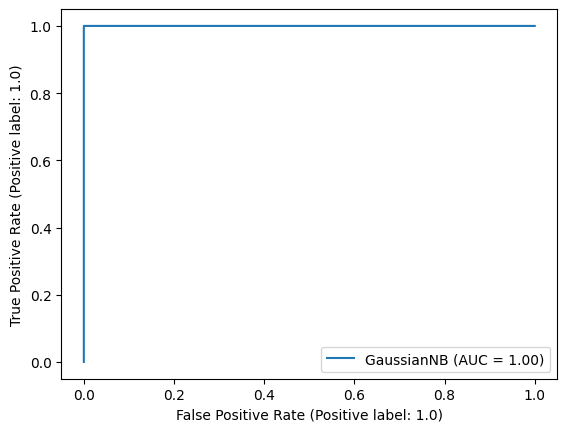

In [37]:
gnb_disp = RocCurveDisplay.from_estimator(gnbclassifier, X_test, y_test)

In [38]:
y_scores = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test,y_scores)
print(auc)

0.9999999787825202


## SVM

In [40]:
model_lin=LinearSVC(dual='auto')
model_lin.fit(X_train, y_train)

LinearSVC(dual='auto')

In [42]:
model_lin_pred = model_lin.predict(X_test)

In [41]:
model_sgd=SGDClassifier()
model_sgd.fit(X_train, y_train)

SGDClassifier()

In [43]:
model_sgd_pred = model_sgd.predict(X_test)

In [46]:
print('Для линейного SVM')
print(classification_report(y_test, model_lin_pred))

Для линейного SVM
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    110698
         1.0       1.00      1.00      1.00    110698

    accuracy                           1.00    221396
   macro avg       1.00      1.00      1.00    221396
weighted avg       1.00      1.00      1.00    221396



In [47]:
print('Для градиентного SVM')
print(classification_report(y_test, model_sgd_pred))

Для градиентного SVM
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    110698
         1.0       0.99      1.00      0.99    110698

    accuracy                           0.99    221396
   macro avg       0.99      0.99      0.99    221396
weighted avg       0.99      0.99      0.99    221396



In [49]:
print('Для линейного SVM')
confusion_matrix(y_test, model_lin_pred)

Для линейного SVM


array([[110483,    215],
       [     0, 110698]], dtype=int64)

In [51]:
print('Для градиентного SVM')
confusion_matrix(y_test,  model_sgd_pred)

Для градиентного SVM


array([[109438,   1260],
       [     0, 110698]], dtype=int64)

In [53]:
print('Для линейного SVM')
print(f'Accuracy: {metrics.accuracy_score(y_test, model_lin_pred)}')
print(f'Precission: {metrics.precision_score(y_test, model_lin_pred)}')
print(f'Roc_Auc_Score: {metrics.roc_auc_score(y_test, model_lin_pred)}')
print(f'Recall: {metrics.recall_score(y_test, model_lin_pred)}')
print(f'F1: {metrics.f1_score(y_test, model_lin_pred)}')

Для линейного SVM
Accuracy: 0.9990288894108295
Precission: 0.998061543732475
Roc_Auc_Score: 0.9990288894108295
Recall: 1.0
F1: 0.999029831551683


In [55]:
print('Для градиентного SVM')
print(f'Accuracy: {metrics.accuracy_score(y_test, model_sgd_pred)}')
print(f'Precission: {metrics.precision_score(y_test, model_sgd_pred)}')
print(f'Roc_Auc_Score: {metrics.roc_auc_score(y_test, model_sgd_pred)}')
print(f'Recall: {metrics.recall_score(y_test, model_sgd_pred)}')
print(f'F1: {metrics.f1_score(y_test,model_sgd_pred)}')

Для градиентного SVM
Accuracy: 0.9943088402681168
Precission: 0.9887457796673753
Roc_Auc_Score: 0.9943088402681168
Recall: 1.0
F1: 0.9943410462776661


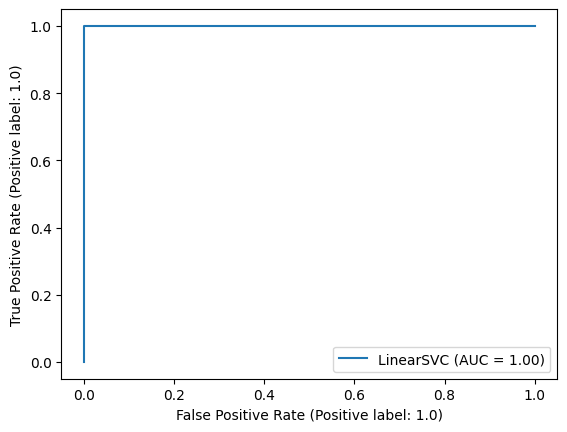

In [56]:
gnb_disp = RocCurveDisplay.from_estimator(model_lin, X_test, y_test)

In [59]:
auc = roc_auc_score(y_test,model_lin_pred)#нету predictproba
print(auc)

0.9990288894108295


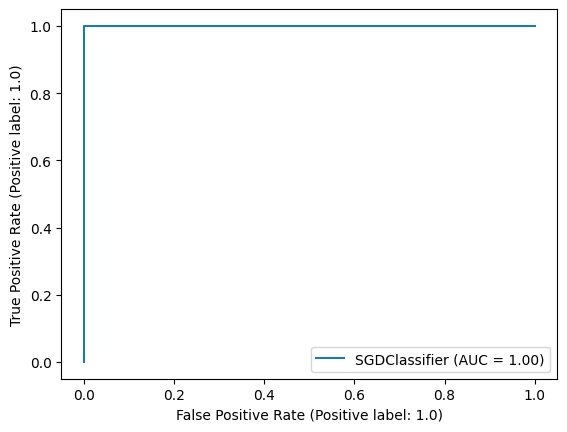

In [57]:
gnb_disp = RocCurveDisplay.from_estimator(model_sgd, X_test, y_test)

In [60]:
auc = roc_auc_score(y_test,model_sgd_pred)#нету predictproba
print(auc)

0.9943088402681168


## Задание 3

## Precision, Recall, F-мера

* $P$ – число истинных результатов, $P = TP + FN$
* $N$ – число ложных результатов, $N = TN + FP.$


![](https://www.bigdataschool.ru/wp-content/uploads/2020/01/%D0%BF%D1%80%D0%BE%D0%B3_3.png)

In [61]:
def findmetrics(m):
    
    tp = m[0][0]
    fp = m[0][1]
    fn = m[1][0]
    tn = m[1][1]
    p = tp + fn
    n = tn + fp
    s = [(tp+tn)/(p+n), tp/(tp + fp), tp/p, p/(tp+(fp+fn)/2)]
    return s

In [62]:
print("Accuracy: ",findmetrics(confusion_matrix(y_test, y_pred))[0])
print("Precision: ",findmetrics(confusion_matrix(y_test, y_pred))[1])
print("Recall: ",findmetrics(confusion_matrix(y_test, y_pred))[2])
print("F1: ",findmetrics(confusion_matrix(y_test, y_pred))[3])
print()
print("LIB")
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Precission: {metrics.precision_score(y_test, y_pred)}')
print(f'Roc_Auc_Score: {metrics.roc_auc_score(y_test, y_pred)}')
print(f'Recall: {metrics.recall_score(y_test, y_pred)}')
print(f'F1: {metrics.f1_score(y_test, y_pred)}')

Accuracy:  0.9914632604021753
Precision:  0.9829265208043506
Recall:  1.0
F1:  0.9913897569998087

LIB
Accuracy: 0.9914632604021753
Precission: 0.9832131310619249
Roc_Auc_Score: 0.9914632604021754
Recall: 1.0
F1: 0.9915355194683052


## Knn

In [63]:
class KNN_myself:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            distances = np.sum((self.X_train - x) ** 2, axis=1)#тут находится расстояние между текущей точкой в цикле и остальными по Eвклиду:)
            k_nearest_indices = np.argsort(distances)[:self.k]#индексы k ближайжих к нашей точке
            k_nearest_labels = self.y_train[k_nearest_indices]# Извлекаются метки классов для ближайших соседей.
            prediction = np.bincount(k_nearest_labels).argmax()# тут смотрится самый часто встречающийся класс и
                                                               #по нему уже ставится класс для группы соседей
            predictions.append(prediction) # в список предсказаний
        return np.array(predictions)

In [69]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1])

In [74]:
confusion_matrix(y_test, y_pred)

array([[80, 13],
       [31, 76]], dtype=int64)

In [75]:
## knn но теперь мой

In [76]:
knn_myself = KNN_myself(k = 3)
knn_myself.fit(X_train, y_train)

In [78]:
predictions = knn_myself.predict(X_test)
predictions

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1], dtype=int64)

In [79]:
confusion_matrix(y_test,predictions)

array([[80, 13],
       [31, 76]], dtype=int64)

In [83]:
np.array_equal(y_pred, predictions)

True